In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os
import report
import scipy as sci


In [3]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '01-08-19-V118',
 '03-05-19-V118',
 '03-26-19-V118',
 '08-14-18-V118',
 'EDA.ipynb',
 'GPS Files',
 'July 6, 2020 Vehicle 118 Expo Line Test Train Data.xlsx',
 'Skytrain Linear Asset Database - Consolidated.xlsx',
 'SMC DATALOG FOR MAR. 5 TEST TRAIN 118-6.xlsx',
 'Switch Maint Works to date - April 2019.xlsx',
 'Test Train Sample Noise Data',
 'Test Train Sample Noise Data.zip']

In [4]:
home = os.getcwd()


In [5]:
os.chdir("03-05-19-V118")
os.getcwd()

'C:\\Users\\tnank\\Documents\\GitHub\\project-sturm_drang\\03-05-19-V118'

In [6]:
files = os.listdir()
csv_files = []
for n in files:
    if re.search(".csv", n):
        csv_files.append(n)

In [7]:
df = pd.read_csv(csv_files[0], header=15, names=["time", "acceleration_a"])
df.head()
df2 = pd.read_csv(csv_files[1], header=15, names=["time", "acceleration_b"])
df2.head()
raw = pd.merge(left=df, right=df2, how = "outer")

In [19]:
del df
del df2

find the relationship between velocity and amplitude
then use the sections of higher quality gps signal to establish the realtionship between velocity and amplitude.

try on 20-30 second fourier transform.

try using

power spectrum/frequency analysis of each accelerometer.

clustering (historical and spacial) expect 5(ish) clusters, stoped, linear tavel, cornering, acceleration/decceleration. (curve radius)  engine/motor (also wheel constant) effects. 

silhouete

break all data files down to one particular consistent section of track

decision tree model for velocity (gps) prediction

first intergral of low frequency acceleration may give velocity.



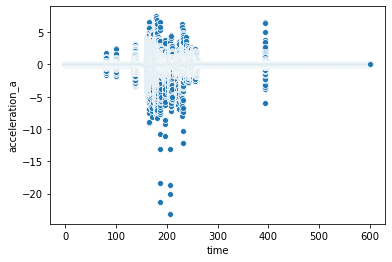

In [8]:

sb.scatterplot(x="time", y="acceleration_a", data= df.loc[df.time<600,:])

In [9]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59744256 entries, 0 to 59744255
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 1.8 GB


In [10]:
raw.describe()

,time,acceleration_a,acceleration_b
count,5.974426e+07,5.974426e+07,5.974426e+07
mean,5.834400e+03,-4.753257e-07,-2.379909e-06
std,3.368492e+03,1.943521e+00,1.777598e+00
min,0.000000e+00,-2.454301e+02,-2.871722e+02
25%,2.917200e+03,-2.410161e-01,-2.312341e-01
50%,5.834400e+03,1.924367e-04,1.500675e-04
75%,8.751600e+03,2.614650e-01,2.489711e-01
max,1.166880e+04,9.579732e+01,1.615189e+02


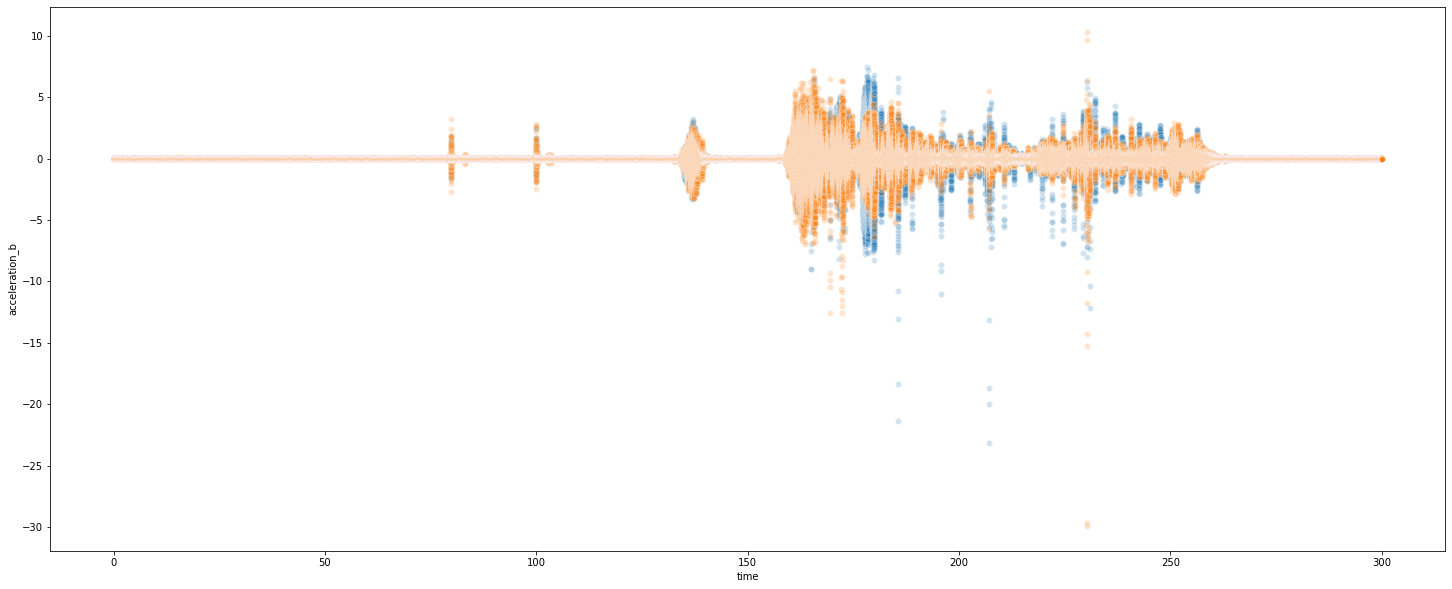

In [11]:
plt.figure(figsize=(25,10))
sb.scatterplot(x="time", y="acceleration_a", data = raw.loc[raw.time<300,:], alpha=0.2)
sb.scatterplot(x="time", y="acceleration_b", data = raw.loc[raw.time<300,:], alpha=0.2)
plt.show()

take first 25 mins for saftey then identify terminus 
abreviate to stoped in yard to stopped in terminus


In [12]:
safe_len =60*25
dev = raw.loc[raw.time<safe_len,:]

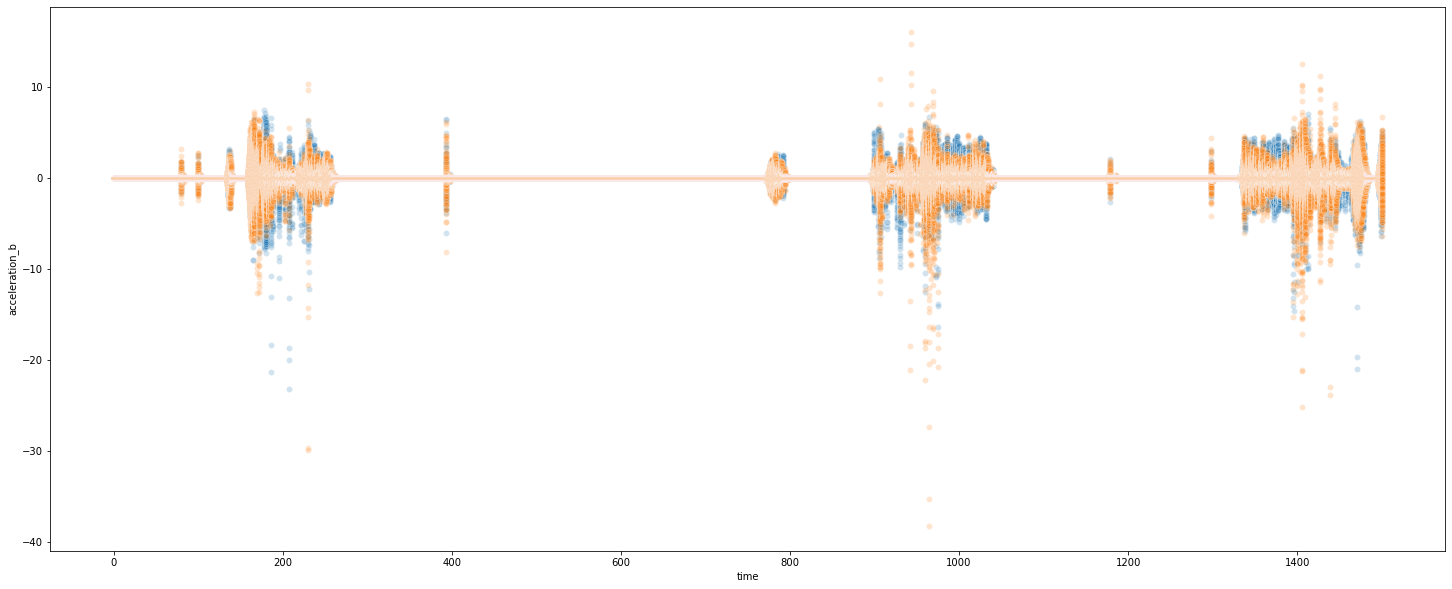

In [13]:
plt.figure(figsize=(25,10))
sb.scatterplot(x="time", y="acceleration_a", data = dev, alpha=0.2)
sb.scatterplot(x="time", y="acceleration_b", data = dev, alpha=0.2)
plt.show()

In [14]:
safe_len

1500

In [15]:
safe_len/60


25.0

In [16]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7680000 entries, 0 to 7679999
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 234.4 MB


In [18]:
dev["abs_a"] = dev["acceleration_a"].abs()
dev["abs_b"] = dev.acceleration_b.abs()
dev.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,time,acceleration_a,acceleration_b,abs_a,abs_b
count,7.680000e+06,7.680000e+06,7.680000e+06,7.680000e+06,7.680000e+06
mean,7.499999e+02,-1.510756e-07,-1.553050e-05,9.601767e-02,9.016995e-02
std,4.330127e+02,2.987497e-01,2.839567e-01,2.828993e-01,2.692597e-01
min,0.000000e+00,-2.313393e+01,-3.825788e+01,0.000000e+00,0.000000e+00
25%,3.750000e+02,-8.651454e-03,-7.740470e-03,3.770675e-03,3.357195e-03
50%,7.499999e+02,-3.700277e-05,-4.702229e-05,8.571115e-03,7.637166e-03
75%,1.125000e+03,8.491754e-03,7.534840e-03,3.808473e-02,3.521621e-02
max,1.500000e+03,7.445345e+00,1.607012e+01,2.313393e+01,3.825788e+01


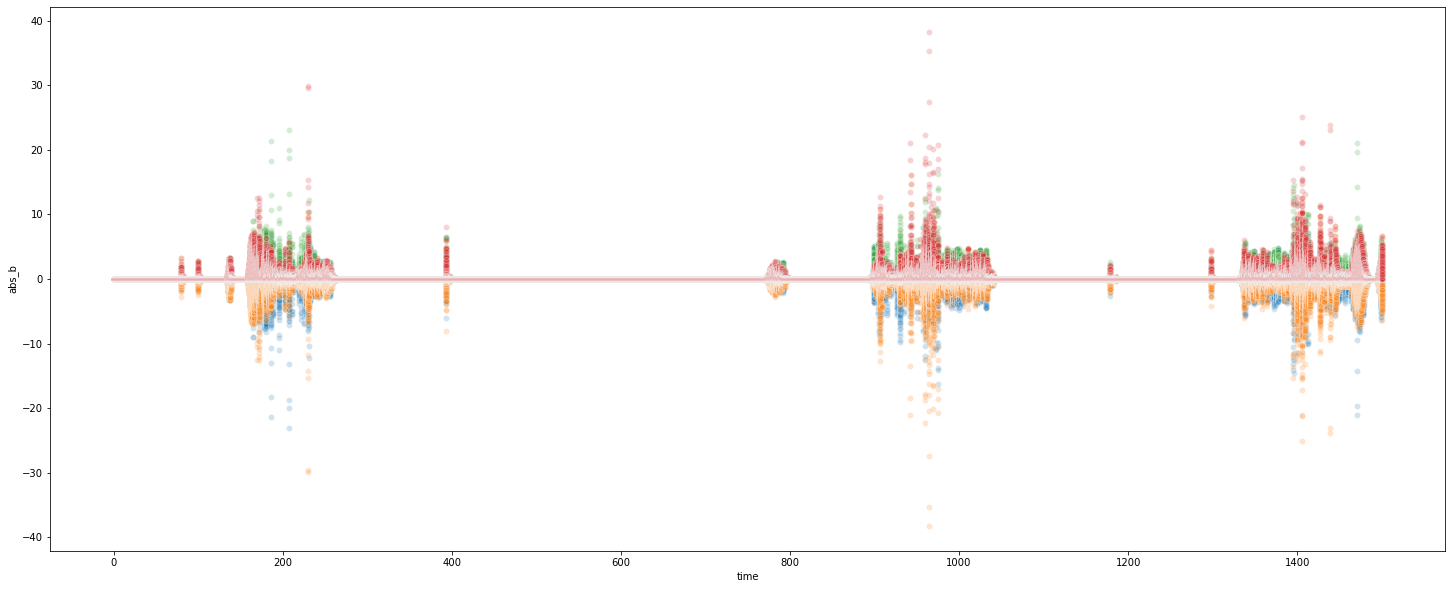

In [31]:
cols = list(dev.columns)
cols.remove("time")
plt.figure(figsize=(25,10))
for n in cols:
    sb.scatterplot(x="time", y=n, data=dev.loc[dev.time <1800,:], alpha=0.2)
plt.show()

In [37]:
y_a = np.fft.fft(dev.acceleration_a)

In [38]:
type(y_a)

numpy.ndarray

In [39]:
len(y_a)

7680000

In [40]:
len(dev)

7680000

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


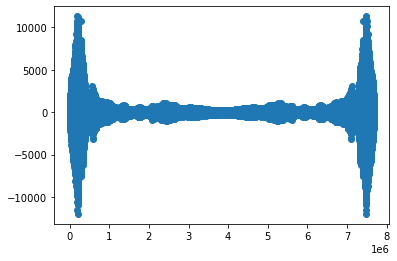

In [145]:
plt.scatter(np.arange(0 , len(y_a)), y_a)
plt.show()
#chunk = raw.loc[(raw.time>3600)&(raw.time<4200),:]
chunk = raw.copy()

In [84]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3072000 entries, 18432000 to 21503999
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 93.8 MB


In [85]:
p2 = abs(y_a/len(dev))


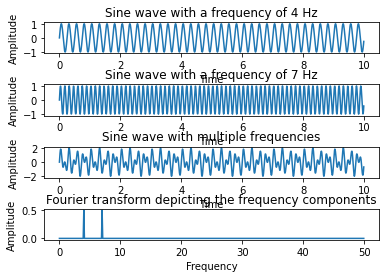

In [86]:
# Python example - Fourier transform using numpy.fft method

import numpy as np

import matplotlib.pyplot as plotter

 

# How many time points are needed i,e., Sampling Frequency

samplingFrequency   = 100;

 

# At what intervals time points are sampled

samplingInterval       = 1 / samplingFrequency;

 

# Begin time period of the signals

beginTime           = 0;

 

# End time period of the signals

endTime             = 10; 

 

# Frequency of the signals

signal1Frequency     = 4;

signal2Frequency     = 7;

 

# Time points

time        = np.arange(beginTime, endTime, samplingInterval);

 

# Create two sine waves

amplitude1 = np.sin(2*np.pi*signal1Frequency*time)

amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

 

# Create subplot

figure, axis = plotter.subplots(4, 1)

plotter.subplots_adjust(hspace=1)

 

# Time domain representation for sine wave 1

axis[0].set_title('Sine wave with a frequency of 4 Hz')

axis[0].plot(time, amplitude1)

axis[0].set_xlabel('Time')

axis[0].set_ylabel('Amplitude')

 

 

# Time domain representation for sine wave 2

axis[1].set_title('Sine wave with a frequency of 7 Hz')

axis[1].plot(time, amplitude2)

axis[1].set_xlabel('Time')

axis[1].set_ylabel('Amplitude')

 

# Add the sine waves

amplitude = amplitude1 + amplitude2

 

# Time domain representation of the resultant sine wave

axis[2].set_title('Sine wave with multiple frequencies')

axis[2].plot(time, amplitude)

axis[2].set_xlabel('Time')

axis[2].set_ylabel('Amplitude')

 

# Frequency domain representation

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

 

tpCount     = len(amplitude)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod

 

# Frequency domain representation

axis[3].set_title('Fourier transform depicting the frequency components')

 

axis[3].plot(frequencies, abs(fourierTransform))

axis[3].set_xlabel('Frequency')

axis[3].set_ylabel('Amplitude')

 

plotter.show()

36864000
9216000


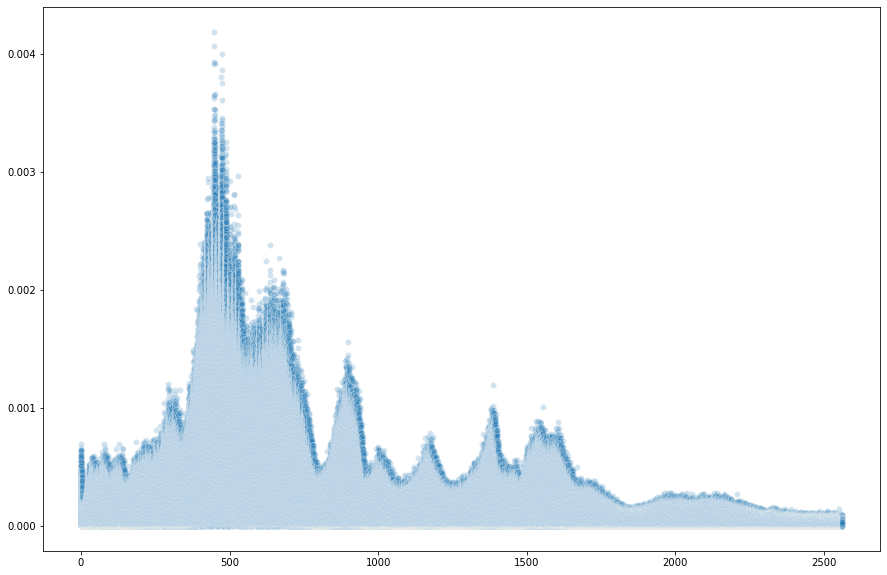

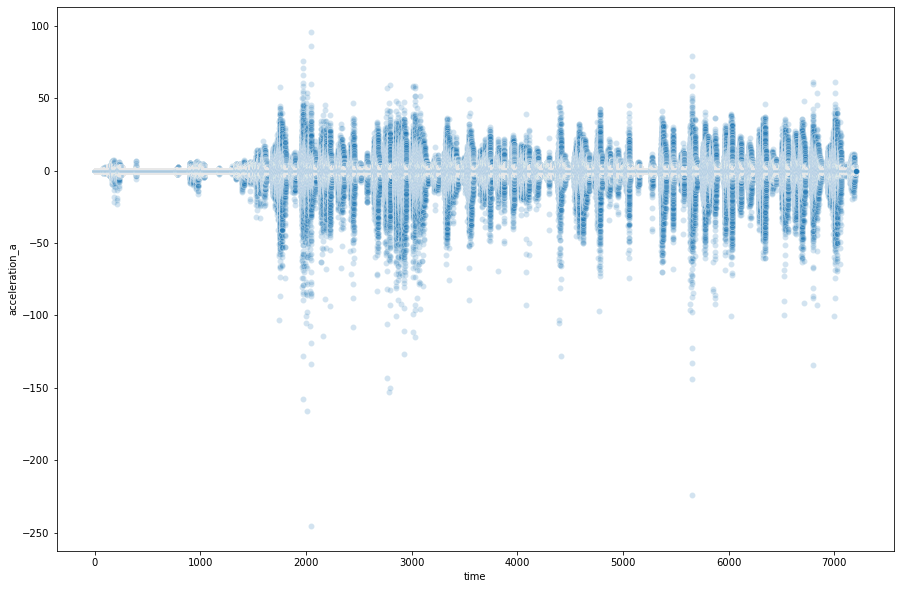

In [149]:
# Python example - Fourier transform using numpy.fft method

import numpy as np

import matplotlib.pyplot as plotter

 

# How many time points are needed i,e., Sampling Frequency

samplingFrequency   = 5120;

 

# At what intervals time points are sampled

samplingInterval       = 1 / samplingFrequency;

 

# Begin time period of the signals

beginTime           = 0;

 

# End time period of the signals

endTime             = 7200; 

 

# Frequency of the signals

signal1Frequency     = 4;

signal2Frequency     = 7;

 

# Time points

time        = np.arange(beginTime, endTime, samplingInterval);
print(len(time))
print(1800*5120)

 

# Create two sine waves

amplitude1 = np.sin(2*np.pi*signal1Frequency*time)

amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

 

# Create subplot



 



 

# Add the sine waves

amplitude = chunk.loc[(chunk.time<endTime)&(chunk.time>beginTime),"acceleration_a"]

 

# Time domain representation of the resultant sine wave


 

# Frequency domain representation

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

 

tpCount     = len(amplitude)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod

 

# Frequency domain representation


plt.figure(figsize=(15,10))
sb.scatterplot(frequencies, abs(fourierTransform), alpha =0.2)

plt.show()
plt.figure(figsize=(15,10))
sb.scatterplot(x="time", y="acceleration_a", data=chunk.loc[(chunk.time<endTime)&(chunk.time>beginTime),:], alpha = 0.2)
plt.show()

feq = pd.DataFrame(data = {"freq":frequencies})

In [150]:
feq.info()
feq["amp"] = abs(fourierTransform)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18431999 entries, 0 to 18431998
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   freq    float64
dtypes: float64(1)
memory usage: 140.6 MB


                 freq       amp
1642         0.228056  0.000590
2611         0.362639  0.000618
2783         0.386528  0.000539
3202         0.444722  0.000625
3234         0.449167  0.000522
...               ...       ...
11810348  1640.326156  0.000539
11813477  1640.760739  0.000504
11838735  1644.268795  0.000543
11843416  1644.918934  0.000518
12017434  1669.088101  0.000501

[1608928 rows x 2 columns]


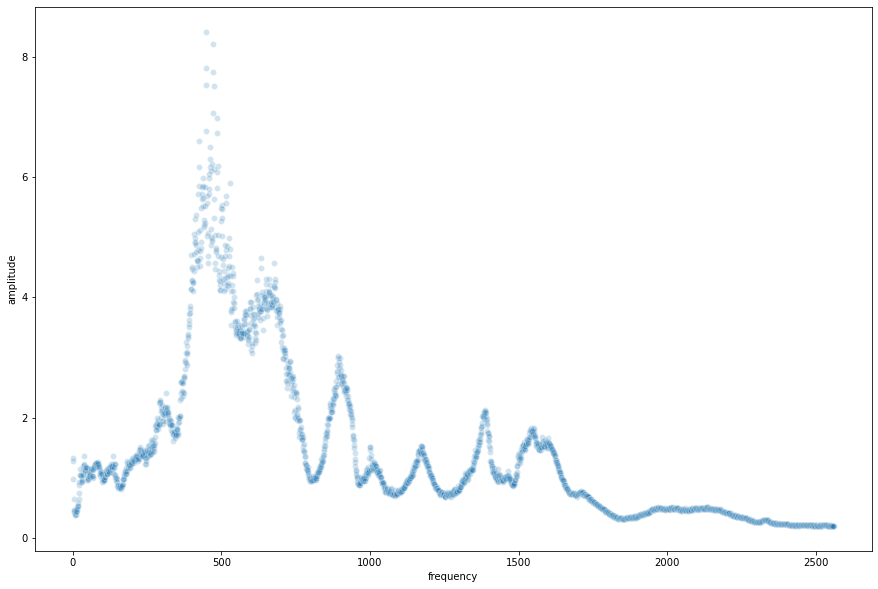

      frequency  amplitude
0             0   1.289789
1             1   1.338476
2             2   0.977022
3             3   0.647578
4             4   0.454868
...         ...        ...
2555       2555   0.208019
2556       2556   0.208017
2557       2557   0.206090
2558       2558   0.205835
2559       2559   0.200416

[2560 rows x 2 columns]


,frequency,amplitude
0,0,1.289789
1,1,1.338476
2,2,0.977022
3,3,0.647578
4,4,0.454868


In [151]:
print(feq.loc[feq.amp>0.0005,:])
freqs = np.arange(0, 1 + int(feq.freq.max()), 1)
amps = []
for n in freqs:
    cu = feq.loc[(feq.freq > n ) & (feq.freq <= n + 1),"amp"].sum()
    amps.append(cu)
sum_feq = pd.DataFrame( data = {"frequency":freqs, "amplitude":amps})

plt.figure(figsize=(15,10))
sb.scatterplot(x= "frequency", y = "amplitude", data=sum_feq, alpha = 0.2)
plt.show()
print(sum_feq.loc[sum_feq.amplitude>0.01,:])
sum_feq.head()


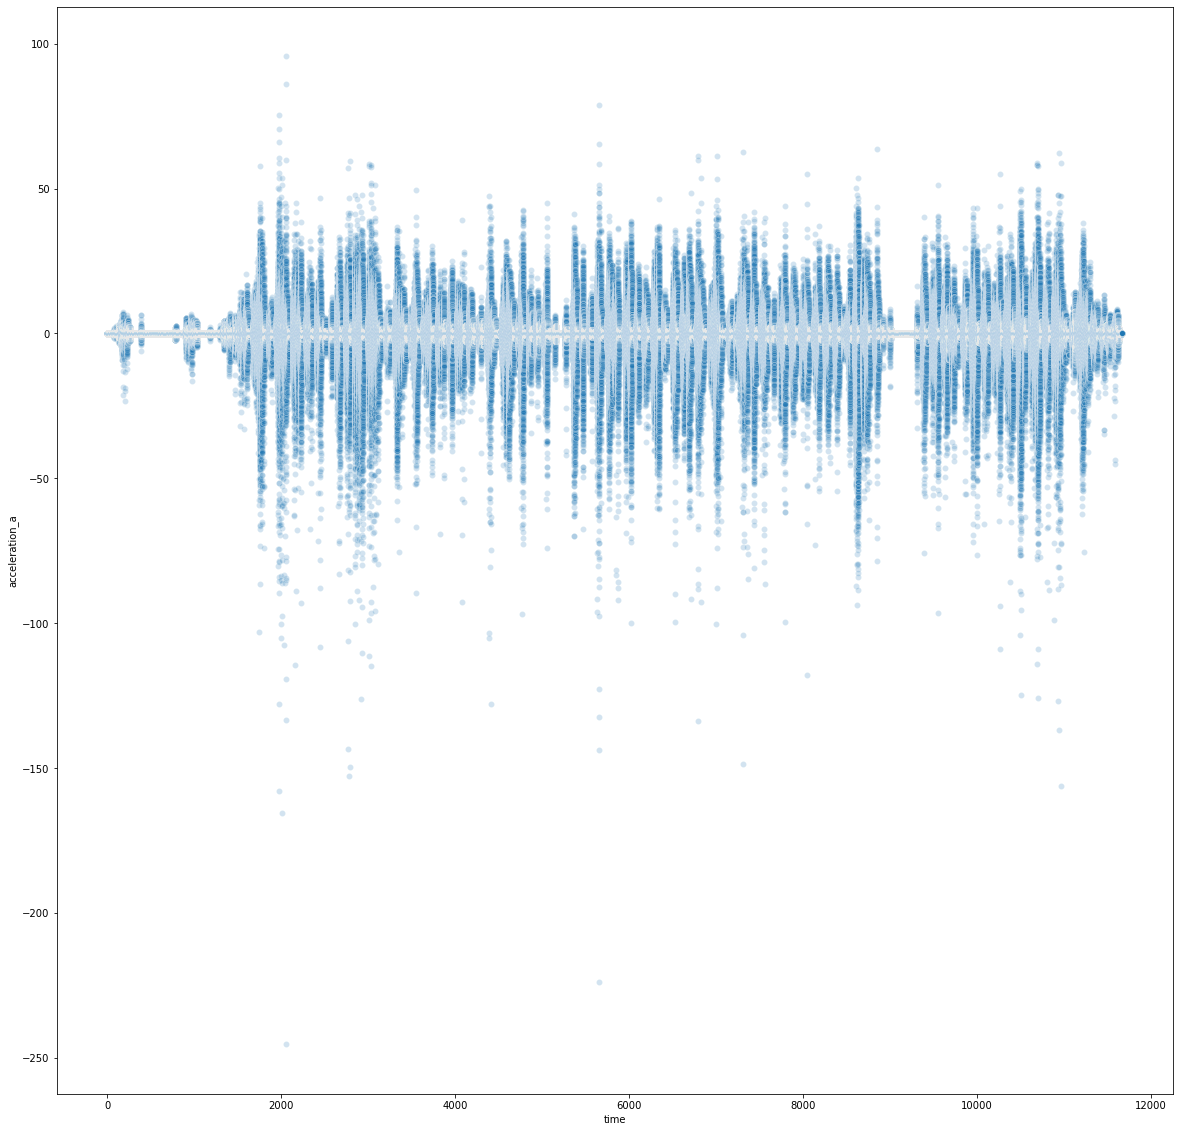

In [152]:
plt.figure(figsize=(20,20))
sb.scatterplot(x = "time", y = "acceleration_a", data = chunk, alpha= 0.2)
plt.show()

In [127]:
type(fourierTransform)
len(fourierTransform)

64000

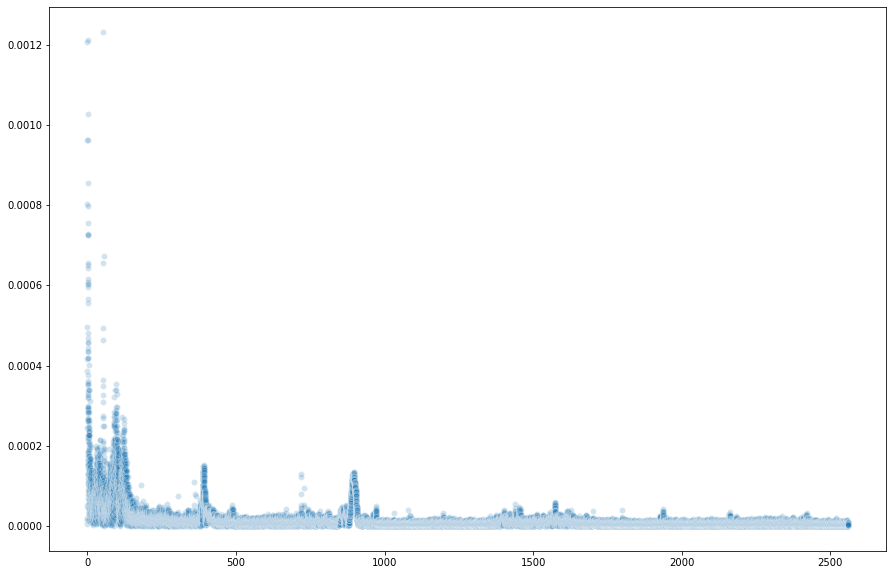

ValueError: Could not interpret input 'time'

<Figure size 1080x720 with 0 Axes>

In [128]:
plt.figure(figsize=(15,10))
sb.scatterplot(frequencies, abs(fourierTransform), alpha =0.2)

plt.show()
plt.figure(figsize=(15,10))
sb.scatterplot(x="time", y="acceleration_a", data=chunk.loc[(chunk.time<endTime)&(chunk.time>beginTime),"acceleration_a"], alpha = 0.2)
plt.show()

In [129]:
print(dev.loc[(dev.time >0.995) & (dev.time < 1.005),:])

          time  acceleration_a  acceleration_b     abs_a     abs_b
5095  0.995117       -0.004126       -0.001106  0.004126  0.001106
5096  0.995313       -0.008159       -0.002047  0.008159  0.002047
5097  0.995508       -0.006263        0.001794  0.006263  0.001794
5098  0.995703       -0.006664        0.000948  0.006664  0.000948
5099  0.995898       -0.006433        0.000440  0.006433  0.000440
5100  0.996094       -0.003540        0.001764  0.003540  0.001764
5101  0.996289       -0.002882        0.000900  0.002882  0.000900
5102  0.996484       -0.005710        0.001806  0.005710  0.001806
5103  0.996680       -0.009192       -0.001640  0.009192  0.001640
5104  0.996875       -0.007124        0.000833  0.007124  0.000833
5105  0.997070       -0.009811       -0.000474  0.009811  0.000474
5106  0.997266       -0.007120       -0.002758  0.007120  0.002758
5107  0.997461       -0.006805       -0.001118  0.006805  0.001118
5108  0.997656       -0.006154       -0.001479  0.006154  0.00

In [130]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3072000 entries, 18432000 to 21503999
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 93.8 MB


In [131]:
range(int(len(amplitude)/2))

range(0, 64000)

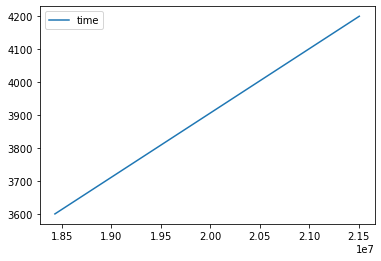

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3072000 entries, 18432000 to 21503999
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 93.8 MB
None


In [132]:
chunk.plot(y="time")
plt.show()
print(chunk.info())

In [133]:
raw.iloc[9215995:9216005,:]

,time,acceleration_a,acceleration_b
9215995,1799.99905,0.188134,-0.362453
9215996,1799.99925,-0.046570,0.630424
9215997,1799.99944,-0.686368,0.265013
9215998,1799.99964,-0.502033,0.858849
9215999,1799.99983,0.843927,1.346160
9216000,1800.00003,-0.177585,0.475746
9216001,1800.00022,-0.376331,0.621149
9216002,1800.00042,-0.312517,0.164888
9216003,1800.00061,0.786916,-0.215421
9216004,1800.00081,1.102900,-0.327661
